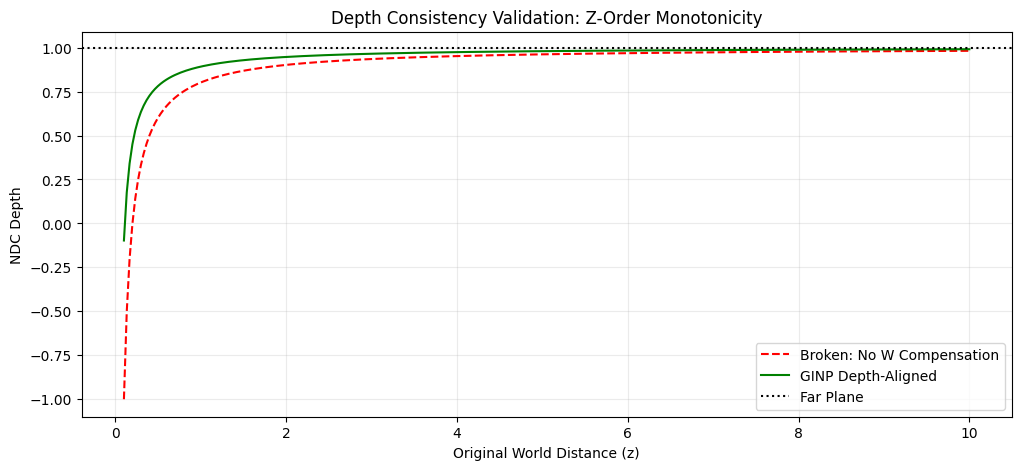

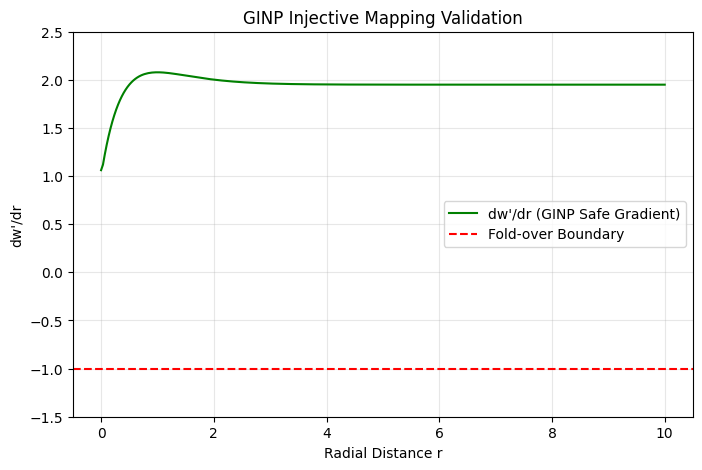

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. Depth Consistency Validation (Z-Order Monotonicity)
# ============================================================

near, far = 0.1, 100.0
z_world = np.linspace(near, 10.0, 300)

def get_safe_w(w, strength=2.0):
    """
    GINP exponential soft-clamped torsion
    Ensures dw'/dw > 0 (injective)
    """
    T_safe = 0.95 * (1.0 - np.exp(-strength))
    return w * (1.0 + T_safe)

# --- Broken case: modify projection without compensating depth
z_ndc_broken = (far + near) / (far - near) \
               - (2 * far * near) / (far - near) / z_world

# --- GINP fixed case: homogeneous depth alignment
w_ginp = get_safe_w(z_world)
z_ndc_fixed = (far + near) / (far - near) \
              - (2 * far * near) / (far - near) / w_ginp

# --- Plot depth behavior
plt.figure(figsize=(12, 5))
plt.plot(z_world, z_ndc_broken, 'r--', label='Broken: No W Compensation')
plt.plot(z_world, z_ndc_fixed, 'g-', label='GINP Depth-Aligned')
plt.axhline(y=1.0, color='black', linestyle=':', label='Far Plane')

plt.title("Depth Consistency Validation: Z-Order Monotonicity")
plt.xlabel("Original World Distance (z)")
plt.ylabel("NDC Depth")
plt.legend()
plt.grid(True, alpha=0.25)
plt.show()


# ============================================================
# 2. Injectivity Validation (Fold-over Safety)
# ============================================================

r = np.linspace(0.0, 10.0, 300)

def w_prime(r, strength=2.0):
    """
    Radial GINP warp with exponential torsion clamp
    """
    T_safe = 0.95 * (1.0 - np.exp(-strength * r))
    return r * (1.0 + T_safe)

w_p = w_prime(r)
dw_dr = np.gradient(w_p, r)

# --- Plot injectivity
plt.figure(figsize=(8, 5))
plt.plot(r, dw_dr, label="dw'/dr (GINP Safe Gradient)", color='green')
plt.axhline(y=-1.0, color='red', linestyle='--', label='Fold-over Boundary')

plt.title("GINP Injective Mapping Validation")
plt.xlabel("Radial Distance r")
plt.ylabel("dw'/dr")
plt.ylim(-1.5, 2.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
